# **Exp.No:** 4
## **Probabilistic Classification using Multinomial Naïve Bayes**
## Scenario 1 – SMS Spam Classification

##SaiSanjayR - 24BAD102

In [17]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import re

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sms-spam-collection-dataset' dataset.
Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [ ]:

df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding="latin-1")
df = df[['v1','v2']]
df.columns = ['label','message']
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:

df['message'] = df['message'].str.lower()
df['message'] = df['message'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))


## Convert Text to Numerical Features using TF-IDF

In [ ]:

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['message'])


## Encode Target Labels

In [ ]:

le = LabelEncoder()
y = le.fit_transform(df['label'])


## Train Test Split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train Multinomial Naïve Bayes Model

In [ ]:

model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)


MultinomialNB()

## Predictions and Evaluation

In [ ]:

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1


(0.9506726457399103, 1.0, 0.6333333333333333, 0.7755102040816326)

## Confusion Matrix Visualization

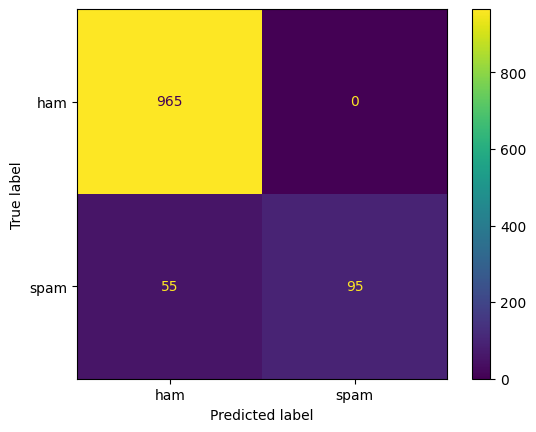

In [ ]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.show()


## Feature Importance (Top Words Influencing Spam Classification)

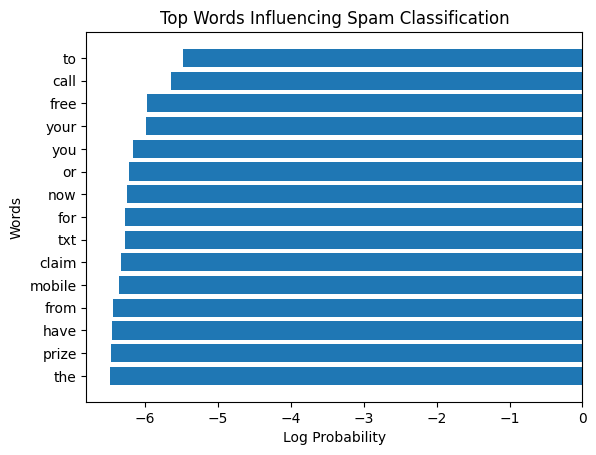

In [14]:

feature_names = np.array(vectorizer.get_feature_names_out())
spam_class_index = list(le.classes_).index('spam')

top_indices = np.argsort(model.feature_log_prob_[spam_class_index])[-15:]
top_words = feature_names[top_indices]
top_scores = model.feature_log_prob_[spam_class_index][top_indices]

plt.figure()
plt.barh(top_words, top_scores)
plt.title("Top Words Influencing Spam Classification")
plt.xlabel("Log Probability")
plt.ylabel("Words")
plt.show()


## Word Frequency Comparison (Spam vs Ham)

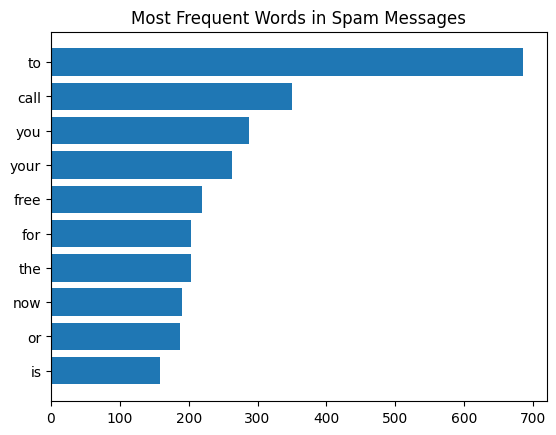

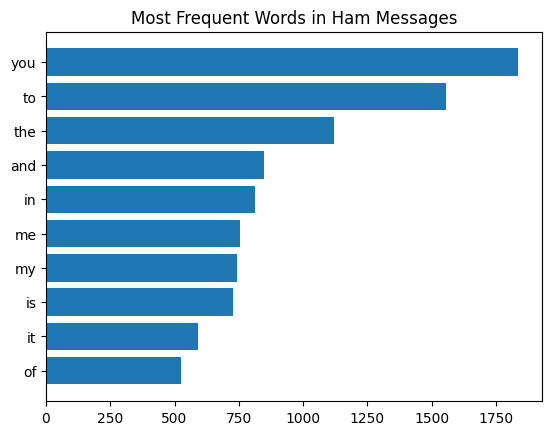

In [18]:
count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(df['message'])
words = np.array(count_vectorizer.get_feature_names_out())

spam_messages = df[df['label'] == 'spam']['message']
ham_messages = df[df['label'] == 'ham']['message']

spam_counts = count_vectorizer.transform(spam_messages).sum(axis=0).A1
ham_counts = count_vectorizer.transform(ham_messages).sum(axis=0).A1

top_spam_freq = np.argsort(spam_counts)[-10:]
top_ham_freq = np.argsort(ham_counts)[-10:]

plt.figure()
plt.barh(words[top_spam_freq], spam_counts[top_spam_freq])
plt.title("Most Frequent Words in Spam Messages")
plt.show()

plt.figure()
plt.barh(words[top_ham_freq], ham_counts[top_ham_freq])
plt.title("Most Frequent Words in Ham Messages")
plt.show()


## Top Words Influencing Spam Classification

In [ ]:
feature_names = np.array(vectorizer.get_feature_names_out())
spam_class_index = list(le.classes_).index('spam')
top_spam_indices = np.argsort(model.feature_log_prob_[spam_class_index])[-10:]
feature_names[top_spam_indices]

array(['claim', 'txt', 'for', 'now', 'or', 'you', 'your', 'free', 'call',
       'to'], dtype=object)